# Home Cage Interaction Analysis

In [1]:
import tdt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
# Get the root directory (adjust according to your folder structure)
root_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Go up one directory to P2_Code
# Add the root directory to sys.path
sys.path.append(root_dir)

from group_tdt_class import *
from experiment_functions import *

In [2]:
experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\mpfc"
csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\mpfc_csvs"
brain_region = '#e06928'

# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac_csvs"
# brain_region = '#1a58af'

In [3]:
group_data = GroupTDTData(experiment_path, csv_base_path)
group_data.batch_process()

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\mpfc\p1-240508-084607\Notes.txt
read from t=0s to t=1812.36s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\mpfc\p2-240508-101128\Notes.txt
read from t=0s to t=1820.76s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\mpfc\p3-240509-070801\Notes.txt
read from t=0s to t=1818.93s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\mpfc\p4-240509-083601\Notes.txt
read from t=0s to t=1745.51s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\mpfc\p5-240823-093250\Notes.txt
read from t=0s to t=1794.17s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\mpfc\p6-240823-105552\Notes.txt
read from t=0s to t=1807.06s
Found Synapse note fil

In [4]:
group_data.hc_processing()

Home Cage Processing p1-240508-084607...
Home Cage Processing p2-240508-101128...
Home Cage Processing p3-240509-070801...
Home Cage Processing p4-240509-083601...
Home Cage Processing p5-240823-093250...
Home Cage Processing p6-240823-105552...
Home Cage Processing p7-240824-053845...
Home Cage Processing p8-240824-070451...


In [5]:
# Define the custom color palette
custom_palette = ['#FF9F1C', '#0077B6', '#D1E8E2', '#55A630', '#E07A5F', '#FFADAD', '#2C2C54', '#792910']

## Average Investigation Time Per bout

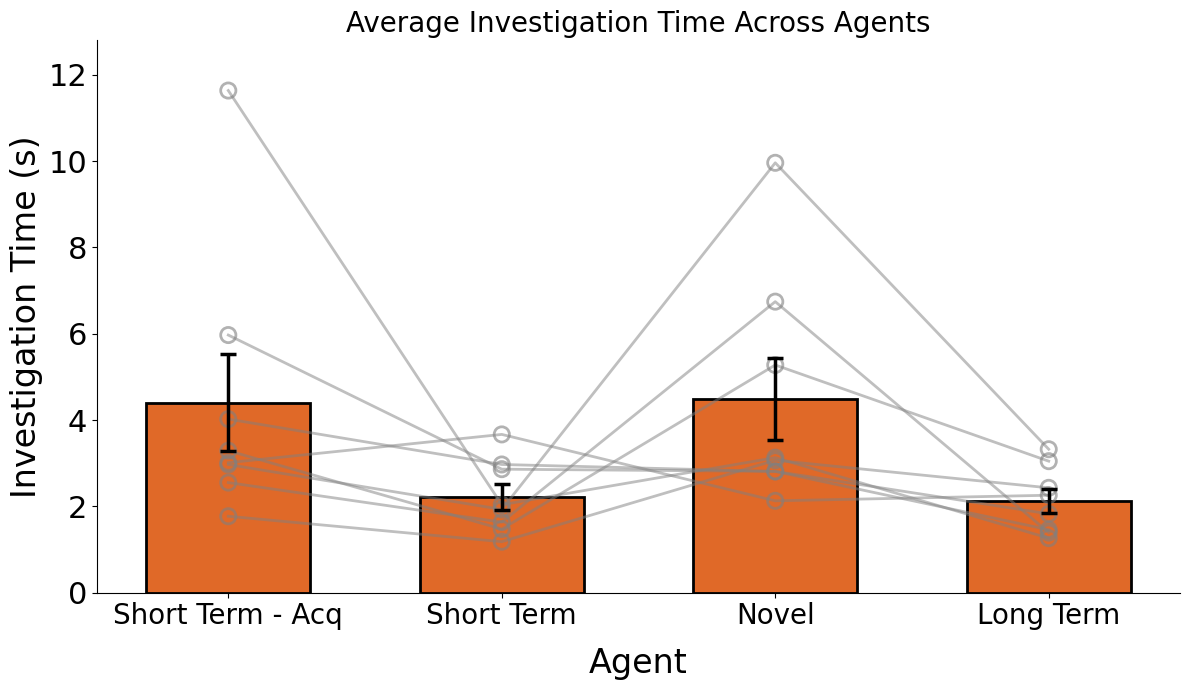

In [6]:
# Define the columns representing the bouts
columns = ['Short_Term_1', 'Short_Term_2', 'Novel_1', 'Long_Term_1']

# Extract average investigation durations
avg_inv_duration_df = extract_average_behavior_durations(group_data=group_data, bouts=columns, behavior='Investigation')

# Custom x-tick labels
custom_labels = ['Short Term - Acq', 'Short Term', 'Novel', 'Long Term']

# Plot the data with custom x-tick labels
# plot_y_across_bouts(avg_inv_duration_df, 'Average Investigation Time Across Bouts', 'Investigation Time (s)', colors=custom_palette, custom_xtick_labels=custom_labels)

plot_y_across_bouts_gray(avg_inv_duration_df, 'Average Investigation Time Across Agents','Investigation Time (s)', custom_xtick_labels=custom_labels,bar_color=brain_region)


## Average Total Investigation Duration per bout

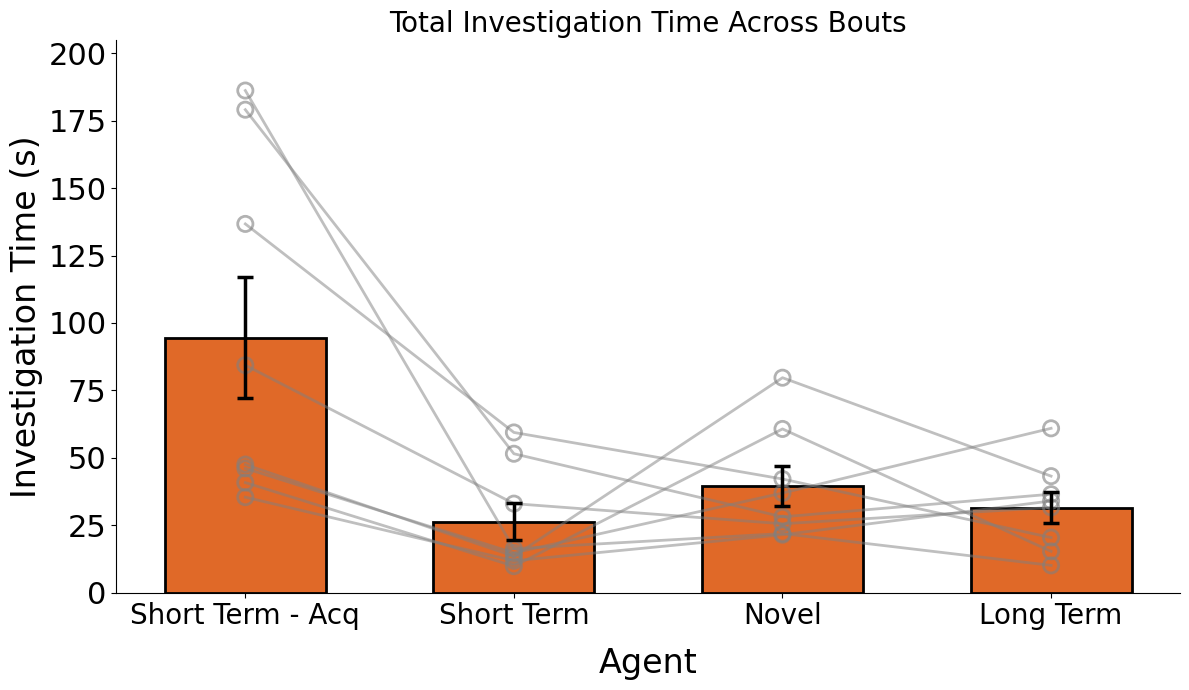

In [7]:
avg_inv_tot_duration_df = extract_total_behavior_durations(group_data=group_data, bouts=columns, behavior = 'Investigation')

# plot_y_across_bouts(avg_inv_tot_duration_df, 'Average Total Investigation Time Across Bouts','Investigation Time (s)', colors=custom_palette, custom_xtick_labels=custom_labels)
plot_y_across_bouts_gray(avg_inv_tot_duration_df, 'Total Investigation Time Across Bouts','Investigation Time (s)', custom_xtick_labels=custom_labels,bar_color=brain_region)

## Mean DA During 1st and 5th Investigation

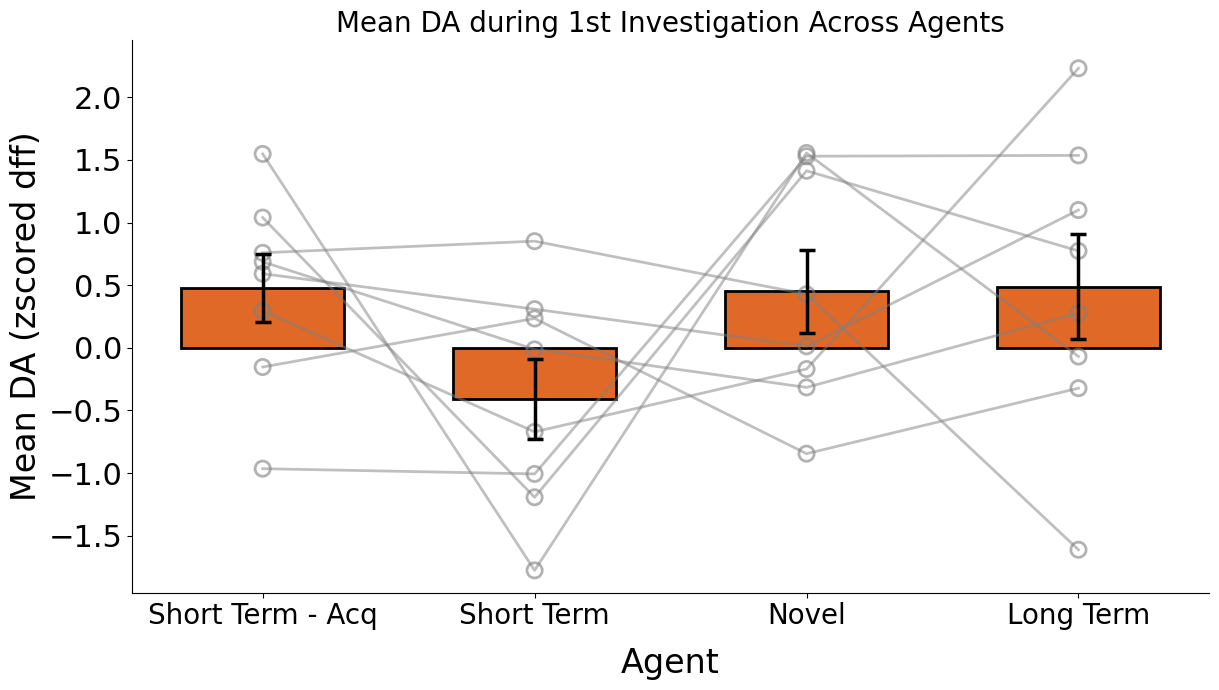

In [8]:
inv_1st_mean_df = extract_nth_behavior_mean_da(group_data=group_data, bouts=columns, behavior='Investigation', n = 1)

# plot_y_across_bouts(inv_1st_mean_df, 'Mean DA during 1st Investigation Across Bouts','Mean DA (zscored dff)')
plot_y_across_bouts_gray(inv_1st_mean_df, 'Mean DA during 1st Investigation Across Agents','Mean DA (zscored dff)', custom_xtick_labels=custom_labels,bar_color=brain_region)

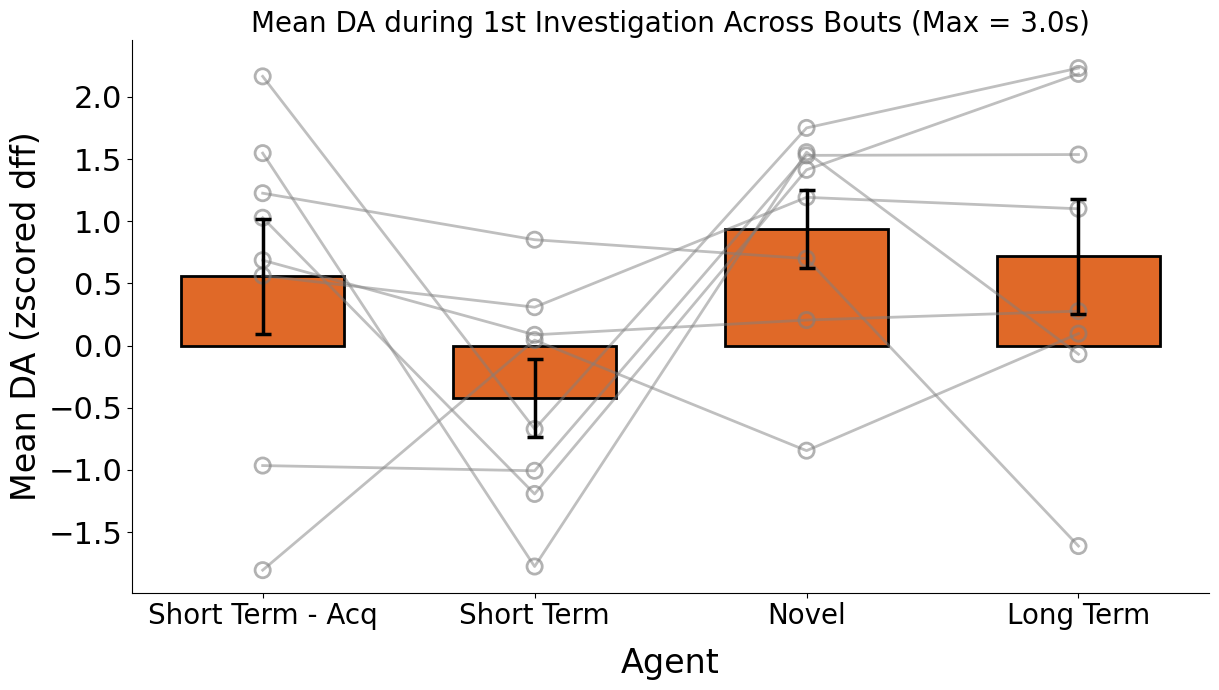

In [9]:
inv_1st_mean_df = extract_nth_behavior_mean_da_corrected(group_data=group_data, bouts=columns, behavior='Investigation', n =1, max_duration=3.0)

plot_y_across_bouts_gray(inv_1st_mean_df, 'Mean DA during 1st Investigation Across Bouts (Max = 3.0s)','Mean DA (zscored dff)', custom_xtick_labels=custom_labels,bar_color=brain_region)

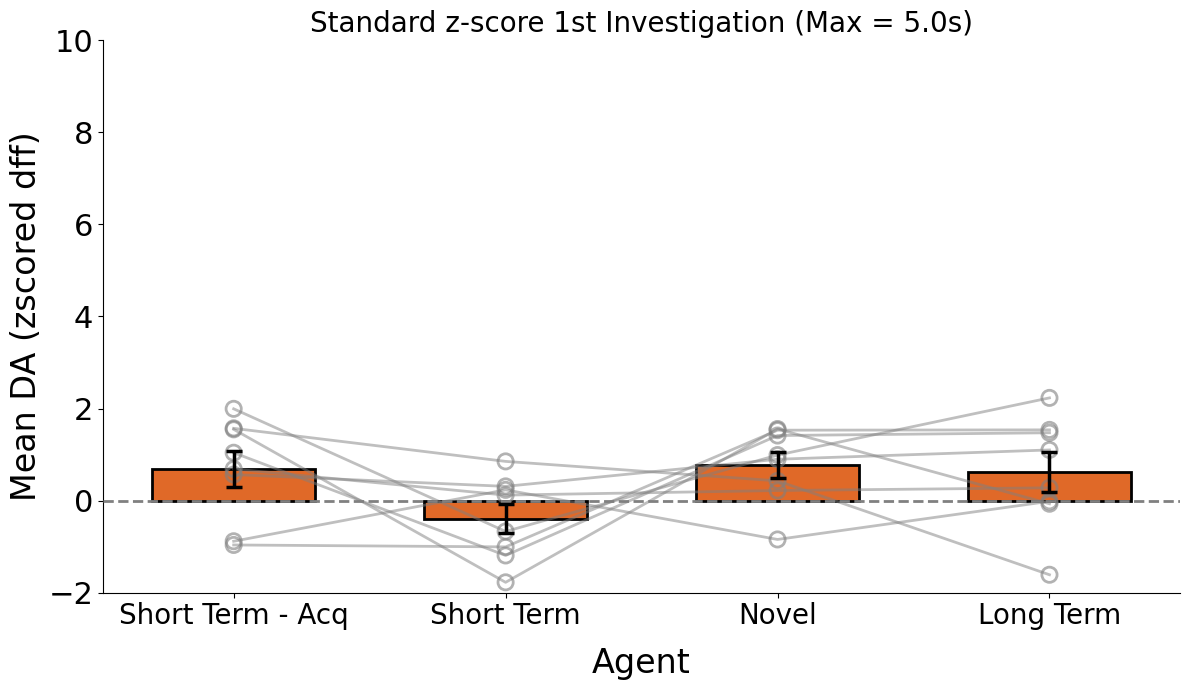

In [10]:
inv_1st_mean_df = extract_nth_behavior_mean_da_corrected(group_data=group_data, bouts=columns, behavior='Investigation', n=1, max_duration=5.0)

plot_y_across_bouts_gray(inv_1st_mean_df, 'Standard z-score 1st Investigation (Max = 5.0s)','Mean DA (zscored dff)', custom_xtick_labels=custom_labels, ylim = (-2,10),bar_color=brain_region)


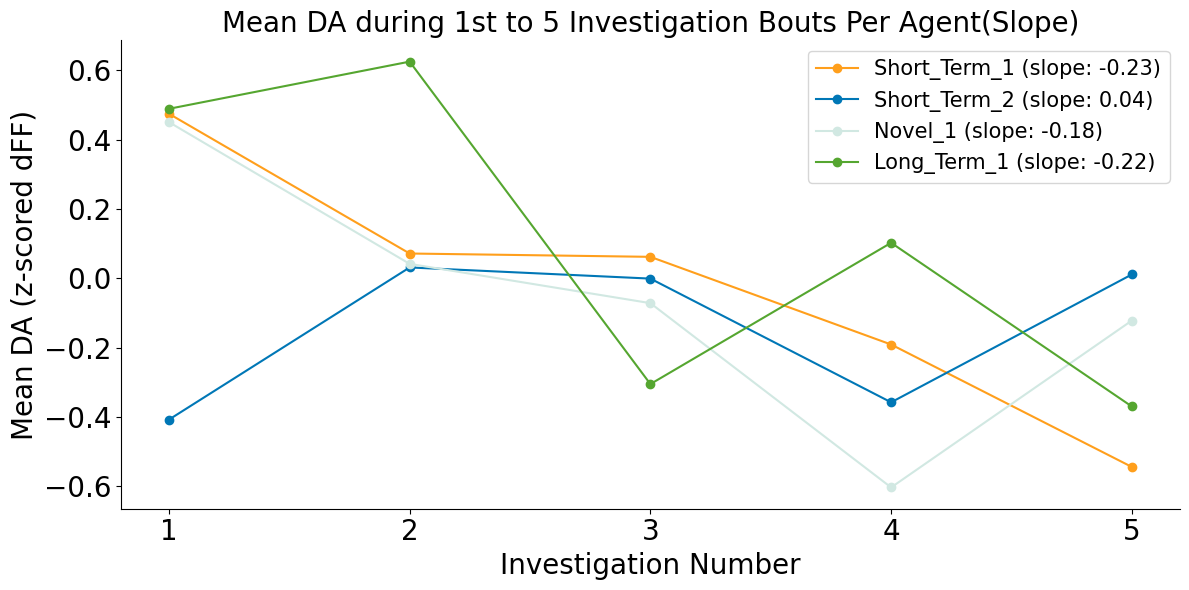

Slope for Short_Term_1: -0.23
Slope for Short_Term_2: 0.04
Slope for Novel_1: -0.18
Slope for Long_Term_1: -0.22


In [11]:
mean_da_df = extract_nth_to_mth_behavior_mean_da(group_data, columns , behavior='Investigation', n_start=1, n_end=5)
plot_meanDA_across_investigations(mean_da_df,columns, max_investigations=5, metric_type='slope',colors=custom_palette, custom_xtick_labels=['1','2','3','4','5'])

## PETH'S

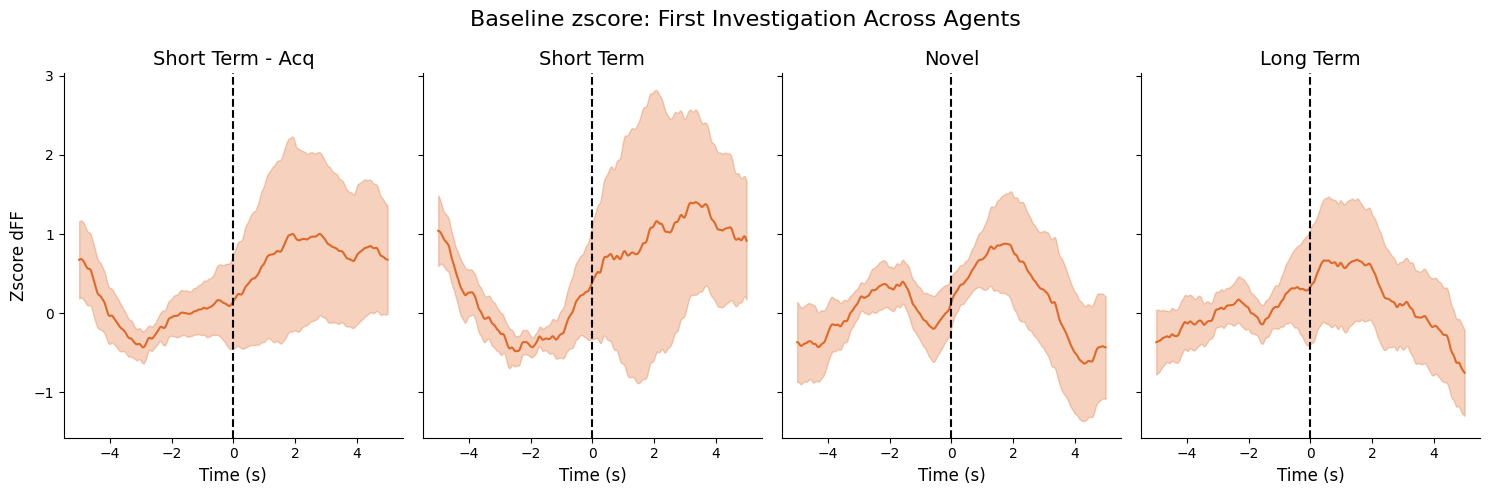

In [12]:
columns = ['Short_Term_1', 'Short_Term_2', 'Novel_1', 'Long_Term_1']

group_data.compute_first_bout_peth_all_blocks(behavior_name='Investigation',bouts= columns, pre_time=5, post_time=5)
group_data.plot_peth_for_bouts(signal_type='zscore', error_type='sem', bouts=columns, title='Baseline zscore: First Investigation Across Agents', color=brain_region, custom_xtick_labels=custom_labels)


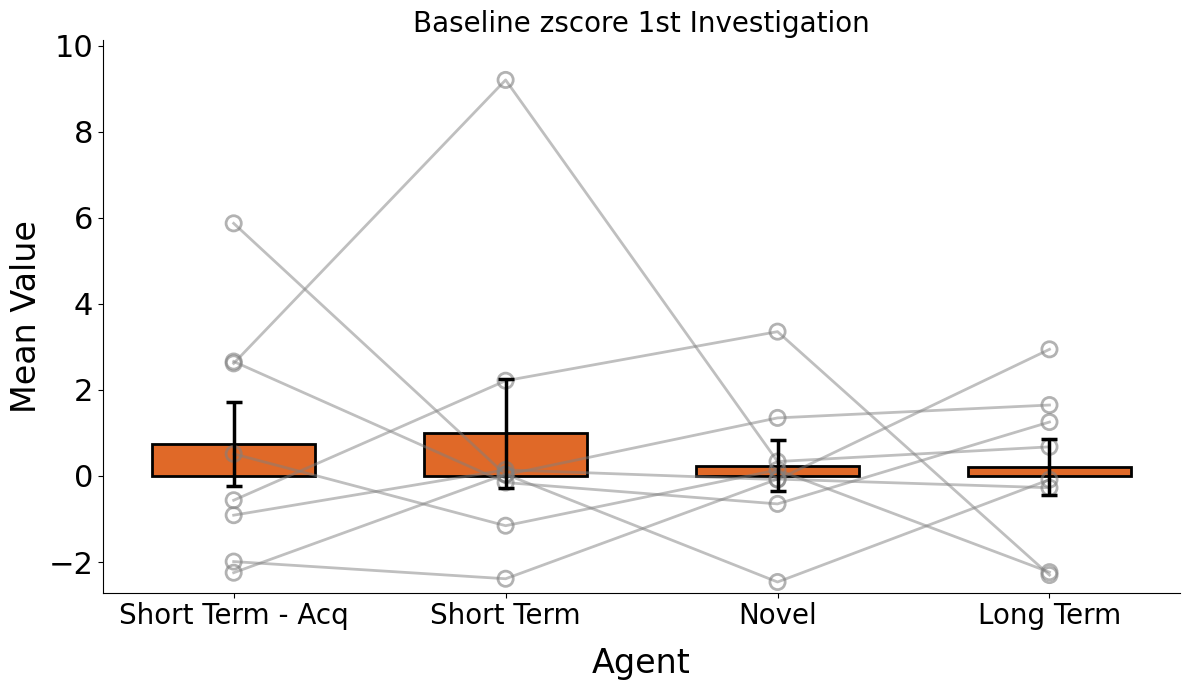

In [13]:
df = extract_nth_behavior_mean_peth(group_data=group_data, bouts=columns,behavior='Investigation',n=1, windows=[(0, 5)])
plot_y_across_bouts_gray(df,title='Baseline zscore 1st Investigation',ylabel='Mean Value', custom_xtick_labels = custom_labels, bar_color=brain_region)


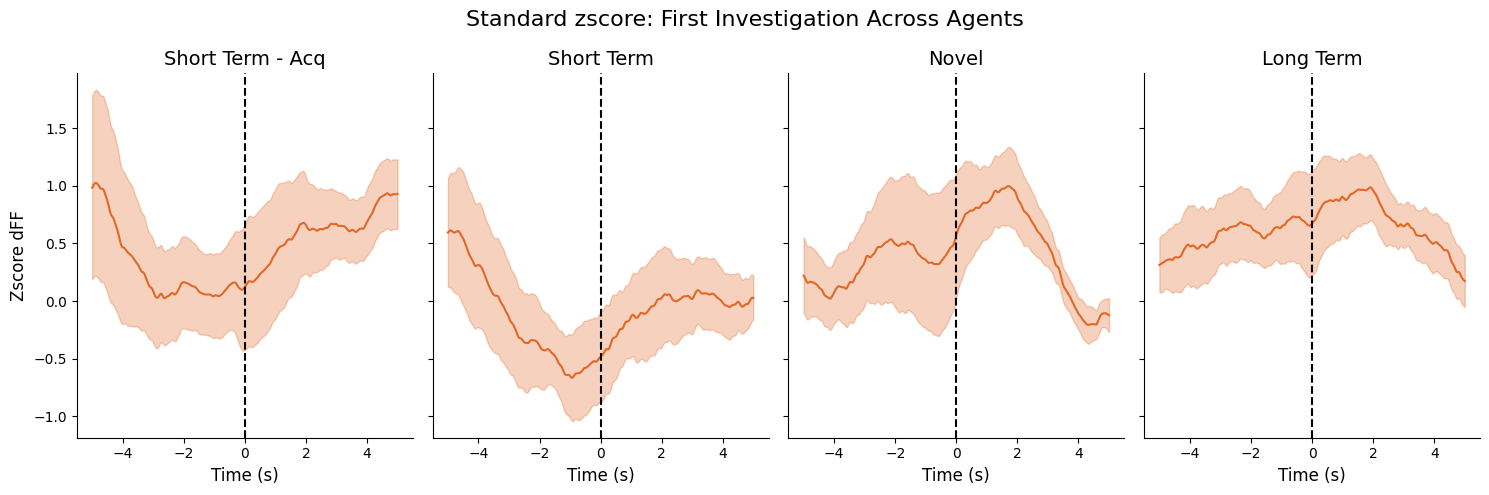

In [14]:
group_data.compute_first_bout_peth_all_blocks_standard(behavior_name='Investigation',bouts= columns, pre_time=5, post_time=5)
group_data.plot_peth_for_bouts(signal_type='zscore', error_type='sem', bouts=columns, title='Standard zscore: First Investigation Across Agents', color=brain_region, custom_xtick_labels=custom_labels)

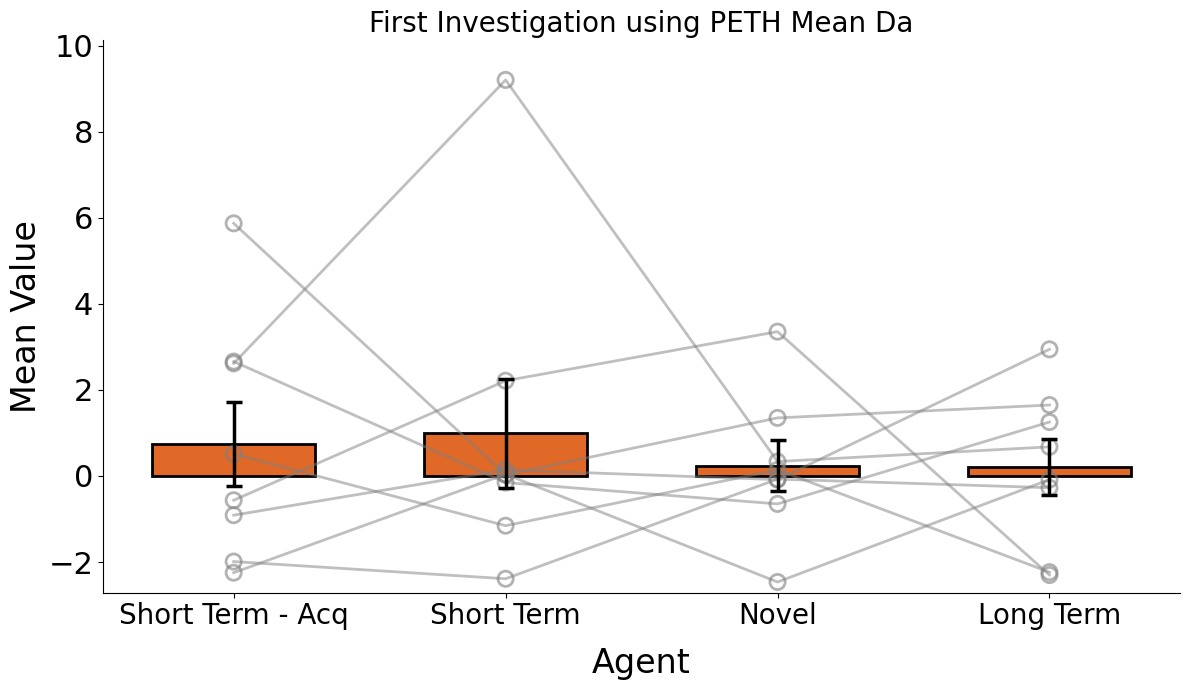

In [15]:
df = extract_nth_behavior_mean_peth(group_data=group_data, bouts=columns,behavior='Investigation',n=1, windows=[(0, 5)])
plot_y_across_bouts_gray(df,title='First Investigation using PETH Mean Da',ylabel='Mean Value', custom_xtick_labels = custom_labels, bar_color=brain_region)

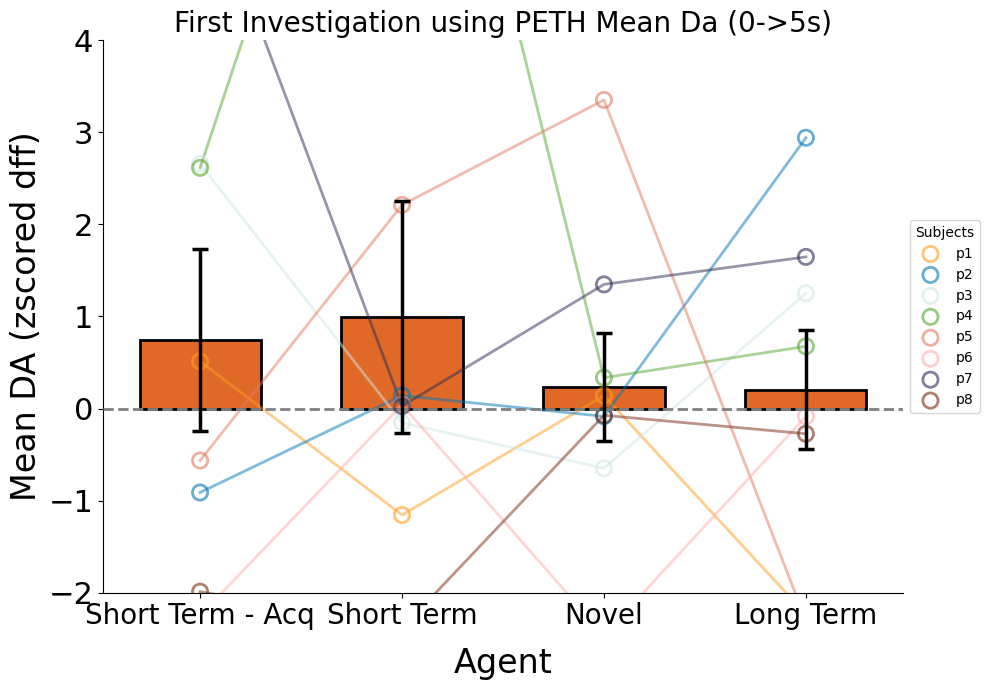

In [16]:
plot_y_across_bouts(df,title='First Investigation using PETH Mean Da (0->5s)',ylabel='Mean DA (zscored dff)', custom_xtick_labels = custom_labels, ylim = (-2,4),bar_color=brain_region)


No occurrences of Approach found in Novel_1.
No occurrences of Approach found in Long_Term_1.
No occurrences of Approach found in Short_Term_2.
No occurrences of Approach found in Novel_1.
No occurrences of Approach found in Long_Term_1.


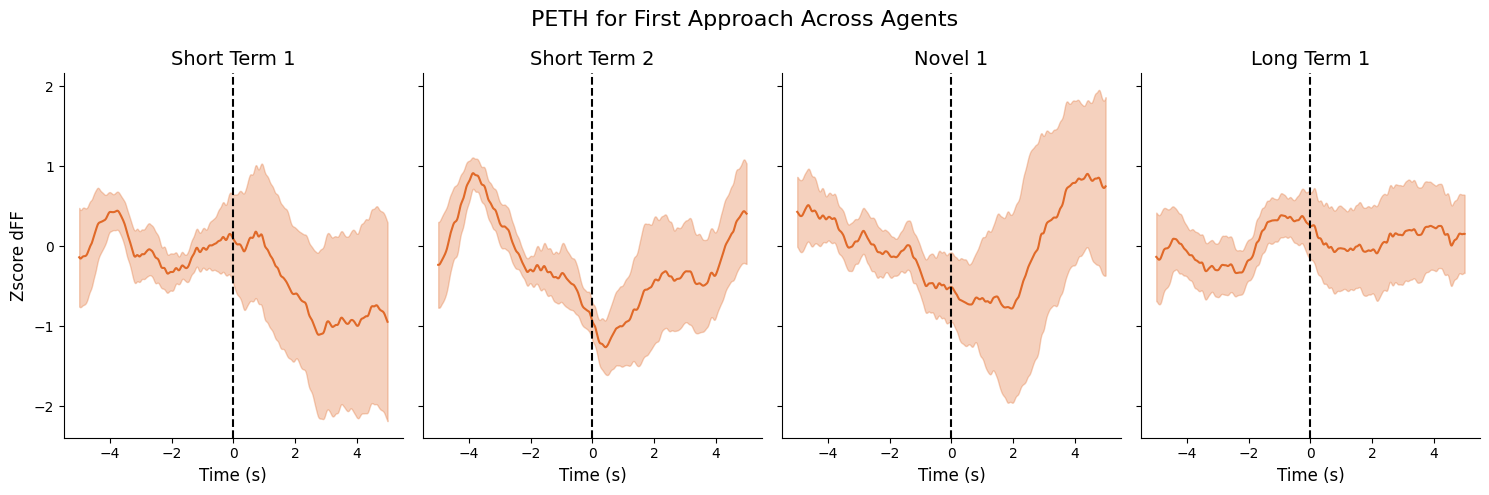

In [17]:
group_data.compute_first_bout_peth_all_blocks(behavior_name='Approach',bouts= columns, pre_time=5, post_time=5)
group_data.plot_peth_for_bouts(signal_type='zscore', error_type='sem', bouts=columns, title='PETH for First Approach Across Agents', color=brain_region)

## Correlation between Investigations and DA Response

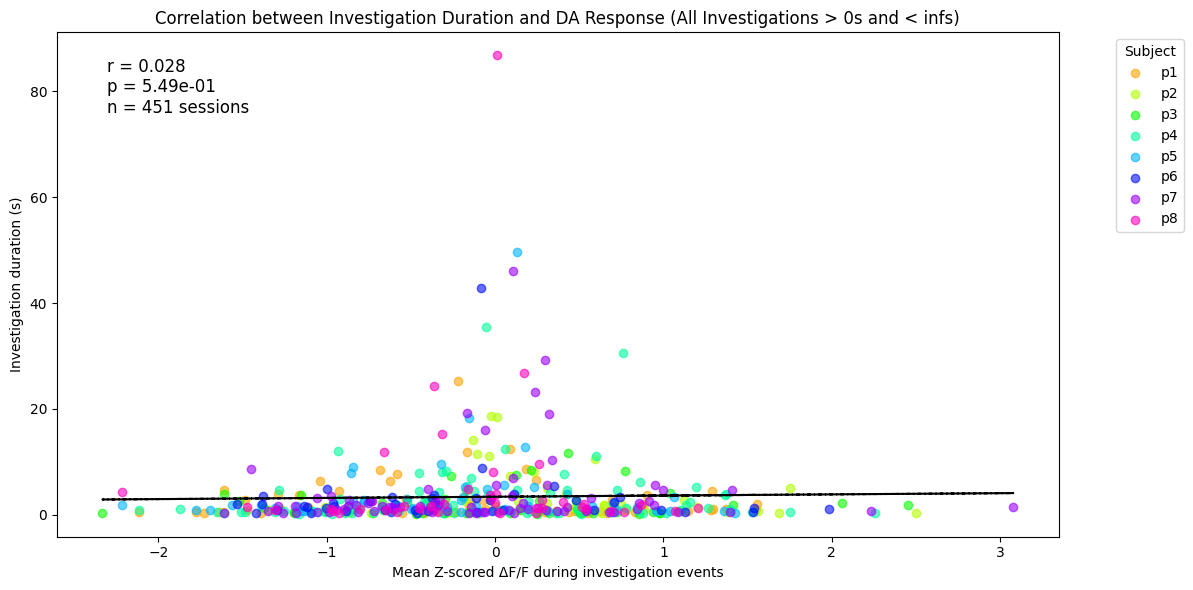

In [18]:
group_data.plot_all_behavior_vs_dff_all(behavior_name='Investigation', min_duration=0)

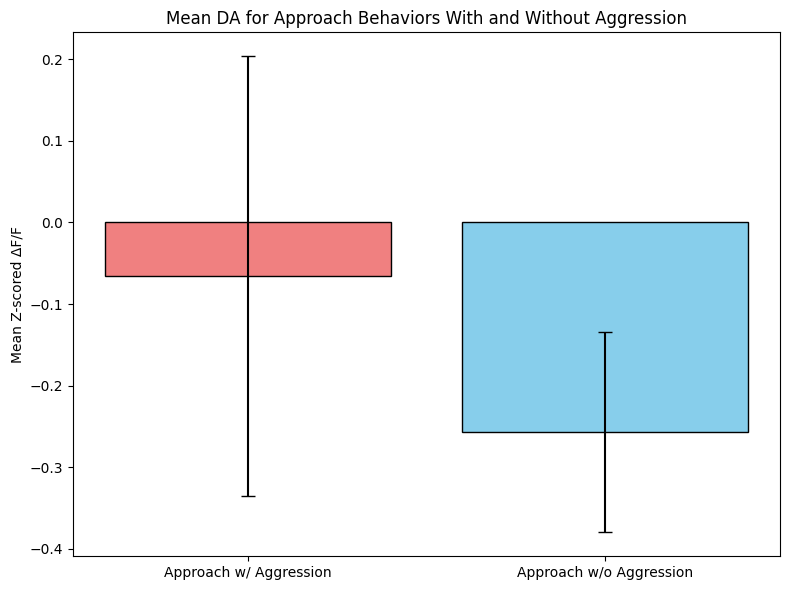

In [19]:
plot_approach_vs_aggression(group_data=group_data, min_duration=0)

In [20]:
# group_data.hc_plot_individual_behavior(behavior_name='all',plot_type='zscore',figsize=(20,8))